#Import

In [1]:
import pandas as pd

In [2]:
# products_cl.csv - list of all products in catalogue
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv - separate list of brands in catalogue
url = "https://drive.google.com/file/d/1gEMqSZqCFcRYJySUUbA2Eh6uwba1h9P1/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

#Using category-IDs to create human-readable categories

##Data Exploration

In [3]:
#looking for most important categories
category_type_df = products_cl.copy()

category_type_df.groupby("type").count().nlargest(50, "sku")

,sku,name,desc,price,in_stock
type,,,,,
11865403,1057,1057,1057,1057,1057
12175397,939,939,939,939,939
1298,783,783,783,783,783
11935397,562,562,562,562,562
11905404,454,454,454,454,454
1282,373,373,373,373,373
12635403,362,362,362,362,362
13835403,269,269,269,269,269
"5,74E+15",247,247,247,247,247


In [4]:
#testbed. scanning items for fitting names
category_type_df.loc[category_type_df["type"] == "10142"].sample(10)

,sku,name,desc,price,in_stock,type
4418,NTE0103,NewerTech NuPower 55 W Battery for MacBook Air...,Battery Compatible with MacBook Air 13 inch fr...,119.99,1,10142
4923,NTE0062,"NewerTech NuPower Battery 65W MacBook Pro 13 ""...",65W internal battery for MacBook Pro 13 inch 2...,131.99,1,10142
9707,NTE0011-A,"Open - NewerTech NuPower Battery MacBook 13 ""w...",MacBook battery 133 inches (White Model) open box,119.99,0,10142
7872,IFX0170,"Battery iFixit MacBook Pro 13 ""Retina (Late 20...",Internal Battery for Macbook Pro Retina 13-inc...,119.99,1,10142
171,NTE0022,"NewerTech NuPower battery MacBook Pro 17 ""(200...",MacBook Pro 17 inch battery.,145.99,0,10142
159,NTE0020,"NewerTech NuPower battery MacBook Pro 15 ""(Lat...",Battery MacBook Pro 15-inch Unibody late 2008 ...,119.99,1,10142
8986,IFX0180,"Battery iFixit MacBook Air 13 ""Late 2010 to Ea...",Battery MacBook Air 13-inch Late 2010 to Early...,119.99,1,10142
812,NTE0063,"NewerTech NuPower Battery 78W MacBook Pro 15 ""...",Battery MacBook Pro 15-inch Unibody 2009/10.,131.99,0,10142
7875,IFX0175,"Battery iFixit MacBook Pro 15 ""Retina Late 201...",Internal Battery for MacBook Pro Retina 15-inc...,142.99,1,10142
4419,NTE0104,NewerTech NuPower 95 W Battery for MacBook Pro...,internal battery MacBook Pro 17-inch Unibody 2011,131.99,1,10142


In [5]:
#How many categories should we create?
n = 40
print(f"With the {n} largest types, we account for {((category_type_df.groupby('type').count().nlargest(n, 'sku')['sku'].sum()) / (category_type_df.shape[0]) * 100).round(2)}% of all products.")

With the 40 largest types, we account for 84.83% of all products.


In [6]:
#lets to this for maybe 20 or 30
#everything thats left = other
#also, add in brands from different table

In [7]:
category_type_df["short"] = category_type_df["sku"].str[:3]
category_type_df = category_type_df.merge(brands, on="short", how="left").copy()
category_type_df = category_type_df.rename(columns={"long": "brand"}).copy()
category_type_df = category_type_df.drop(columns=["short"]).copy()

category_type_df

,sku,name,desc,price,in_stock,type,brand
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,Rain Design
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,Apple
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,Apple
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,Apple
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,Kingston
...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,Belkin
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Thule
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Thule
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,Thule


##Create categories

In [8]:
category_type_df["category"] = ""

In [9]:
category_type_df.loc[category_type_df["type"] == "11865403", "category"] += "iPhone and iPad Accessories"
category_type_df.loc[category_type_df["type"] == "12175397", "category"] += "Servers"
category_type_df.loc[category_type_df["type"] == "1298", "category"] += "Already Opened Products"
category_type_df.loc[category_type_df["type"] == "11935397", "category"] += "Storage Devices"
category_type_df.loc[category_type_df["type"] == "11905404", "category"] += "Smart Tech & Connected Gadgets"
category_type_df.loc[category_type_df["type"] == "1282", "category"] += "iMac Computers"
category_type_df.loc[category_type_df["type"] == "12635403", "category"] += "iPhone and iPad Accessories"
category_type_df.loc[category_type_df["type"] == "13835403", "category"] += "MacBook and iMac Accessories"
category_type_df.loc[category_type_df["type"] == "5,74E+15", "category"] += "iMac Computers"
category_type_df.loc[category_type_df["type"] == "1364", "category"] += "Storage Devices"
category_type_df.loc[category_type_df["type"] == "12585395", "category"] += "Adapters and Cables"
category_type_df.loc[category_type_df["type"] == "1296", "category"] += "Monitors"
category_type_df.loc[category_type_df["type"] == "1325", "category"] += "Adapters and Cables"
category_type_df.loc[category_type_df["type"] == "5384", "category"] += "Headphones, Speakers and Bluetooth Devices"
category_type_df.loc[category_type_df["type"] == "1433", "category"] += "Storage Devices"
category_type_df.loc[category_type_df["type"] == "24895185", "category"] += "Apple Watches"
category_type_df.loc[category_type_df["type"] == "24885185", "category"] += "Apple Watches"
category_type_df.loc[category_type_df["type"] == "1216", "category"] += "iPhone and iPad Accessories"
category_type_df.loc[category_type_df["type"] == "118692158", "category"] += "iMac Computers"
category_type_df.loc[category_type_df["type"] == "1230", "category"] += "Adapters and Cables"
category_type_df.loc[category_type_df["type"] == "9094", "category"] += "Smart Tech & Connected Gadgets"
category_type_df.loc[category_type_df["type"] == "8696", "category"] += "MacBook and iMac Accessories"
category_type_df.loc[category_type_df["type"] == "11821715", "category"] += "iPods"
category_type_df.loc[category_type_df["type"] == "1392", "category"] += "Backpacks and Bags"
category_type_df.loc[category_type_df["type"] == "21485407", "category"] += "Tools and Replacement Parts"
category_type_df.loc[category_type_df["type"] == "1387", "category"] += "Keyboards and Computer Mice"
category_type_df.loc[category_type_df["type"] == "113281716", "category"] += "iPhones"
category_type_df.loc[category_type_df["type"] == "5,39E+11", "category"] += "MacBooks"
category_type_df.loc[category_type_df["type"] == "5,49E+11", "category"] += "iPhone and iPad Accessories"
category_type_df.loc[category_type_df["type"] == "42945397", "category"] += "Storage Devices"
category_type_df.loc[category_type_df["type"] == "12645406", "category"] += "Tools and Replacement Parts"
category_type_df.loc[category_type_df["type"] == "2,16E+11", "category"] += "iMac Computers"
category_type_df.loc[category_type_df["type"] == "85651716", "category"] += "iPhones"
category_type_df.loc[category_type_df["type"] == "51601716", "category"] += "iPhones"
category_type_df.loc[category_type_df["type"] == "24215399", "category"] += "Apple Watch Accessories"
category_type_df.loc[category_type_df["type"] == "14305406", "category"] += "Tools and Replacement Parts"
category_type_df.loc[category_type_df["type"] == "5405", "category"] += "iPhone and iPad Accessories"
category_type_df.loc[category_type_df["type"] == "13005399", "category"] += "Power Banks, Docking Stations and Charging Devices"
category_type_df.loc[category_type_df["type"] == "21632158", "category"] += "iMac Computers"
category_type_df.loc[category_type_df["type"] == "2,17E+11", "category"] += "MacBooks"
category_type_df.loc[category_type_df["type"] == "13855401", "category"] += "Keyboards and Computer Mice"
category_type_df.loc[category_type_df["type"] == "12141714", "category"] += "iPads"
category_type_df.loc[category_type_df["type"] == "85641716", "category"] += "iPhones"
category_type_df.loc[category_type_df["type"] == "10230", "category"] += "MacBook and iMac Accessories"
category_type_df.loc[category_type_df["type"] == "10142", "category"] += "Tools and Replacement Parts"
category_type_df.loc[category_type_df["type"] == "1716", "category"] += "iPhones"
category_type_df.loc[category_type_df["type"] == "1416", "category"] += "Software"
category_type_df.loc[category_type_df["type"] == "2434", "category"] += "Apple Watch Accessories"
category_type_df.loc[category_type_df["type"] == "51861714", "category"] += "iPads"
category_type_df.loc[category_type_df["type"] == "1714", "category"] += "iPads"
category_type_df.loc[category_type_df["type"] == "106431714", "category"] += "iPads"
category_type_df.loc[category_type_df["type"] == "51871714", "category"] += "iPads"
category_type_df.loc[category_type_df["type"] == "24811716", "category"] += "iPhones"
category_type_df.loc[category_type_df["type"] == "1276", "category"] += "MacBook and iMac Accessories"
category_type_df.loc[category_type_df["type"] == "13621714", "category"] += "iPads"
category_type_df.loc[category_type_df["type"] == "24821716", "category"] += "iPhones"
category_type_df.loc[category_type_df["type"] == "14365395", "category"] += "Adapters and Cables"
category_type_df.loc[category_type_df["type"] == "14035403", "category"] += "iPhone and iPad Accessories"
category_type_df.loc[category_type_df["type"] == "12575403", "category"] += "iPhone and iPad Accessories"

category_type_df.loc[category_type_df["type"] == "12215397","category"] += 'Storage Devices'
category_type_df.loc[category_type_df["type"] == "5398","category"] += 'Headphones, Speakers and Bluetooth Devices'
category_type_df.loc[category_type_df["type"] == "1,02E+12","category"] += 'MacBooks'
category_type_df.loc[category_type_df["type"] == "1,44E+11","category"] += 'Apple Device Repair Services'
category_type_df.loc[category_type_df["type"] == "57445397","category"] += 'Storage Devices'
category_type_df.loc[category_type_df["type"] == "1334","category"] += 'Network and Connectivity Devices'
category_type_df.loc[category_type_df["type"] == "2158","category"] += 'MacBooks'
category_type_df.loc[category_type_df["type"] == "2449","category"] += 'Apple Watch Accessories'
category_type_df.loc[category_type_df["type"] == "12655397","category"] += 'Storage Devices'
category_type_df.loc[category_type_df["type"] == "1229","category"] += 'iPhone and iPad Accessories'
category_type_df.loc[category_type_df["type"] == "12995397","category"] += 'Power Banks, Docking Stations and Charging Devices'
category_type_df.loc[category_type_df["type"] == "1515","category"] += 'Power Banks, Docking Stations and Charging Devices'
category_type_df.loc[category_type_df["type"] == "13615399","category"] += 'Power Banks, Docking Stations and Charging Devices'
category_type_df.loc[category_type_df["type"] == "13555403","category"] += 'iPhone and iPad Accessories'
category_type_df.loc[category_type_df["type"] == "1405","category"] += 'Tablets and Smart Pads'


category_type_df.loc[category_type_df["category"] == "", "category"] += "Other"

##Check categories

In [10]:
category_type_df["category"].value_counts()

,count
category,
iPhone and iPad Accessories,1793
Storage Devices,1397
Servers,939
Already Opened Products,783
iMac Computers,771
Smart Tech & Connected Gadgets,504
Other,479
Adapters and Cables,467
MacBook and iMac Accessories,373


#Download Table

In [11]:
from google.colab import files
category_type_df.to_csv("products_category.csv", index=False)
files.download("products_category.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Vizalization of discounts and sales

In [12]:
import seaborn as sns

In [13]:
#change display settings of notebook for ease if use
pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [14]:
# orderlines_qu.csv - list of ordered products
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

##Merge tables to group sales

In [15]:
products_category = category_type_df

In [16]:
merged = orderlines_qu.merge(products_category,
                  on='sku', how="left")

##Order best selling categories

In [17]:
top = merged.groupby('category').agg(total_sold=('product_quantity', 'sum')).reset_index()

In [18]:
top_20 = top.sort_values(by='total_sold', ascending=False).head(20)

##Create graphs

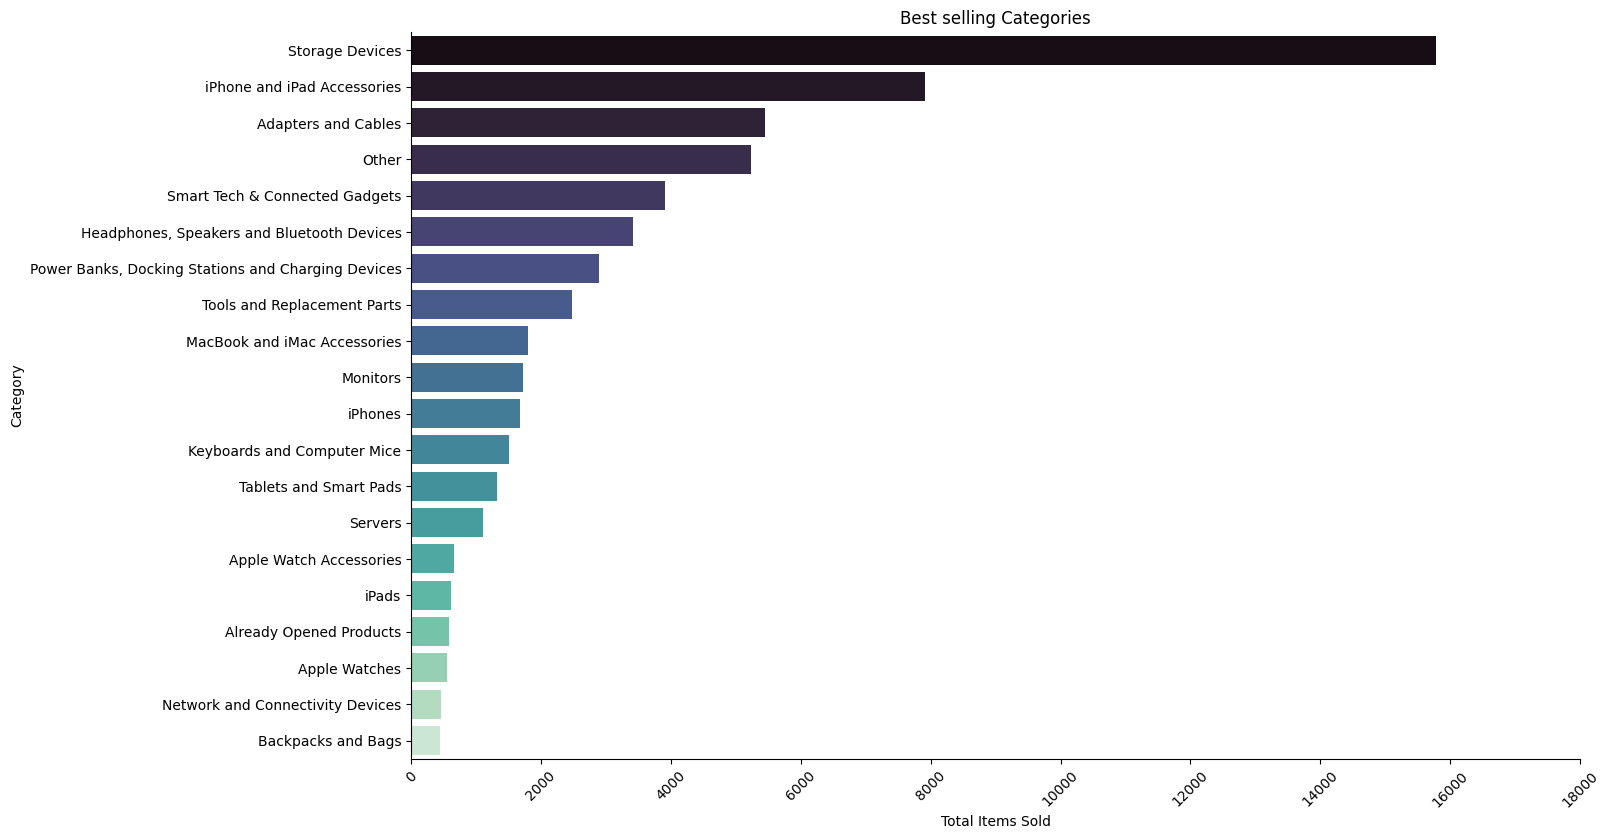

In [19]:
to_20_plot = sns.catplot(top_20, y='category', x='total_sold',hue='category', kind='bar', palette="mako", height= 8, aspect=2)


to_20_plot.set(title='Best selling Categories')
ax=to_20_plot.ax
ax.set_xlabel("Total Items Sold")
ax.set_ylabel("Category")
to_20_plot.set_xticklabels(rotation=45);

In [20]:
#calculate and display discounts
merged["discount"] = merged["price"]-merged["unit_price"]
merged["discount_percent"] = (merged["price"]-merged["unit_price"])/(merged["price"])*100
merged.sample(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,brand,category,discount,discount_percent
7058,1176133,322169,0,1,ADN0045,46.99,2017-02-10 10:08:13,Adonit Jot Dash 2 Pointer Silver,Egonómico slightly pointer design and up to 14 hours battery for iPad iPhone or iPod,49.99,0,1229,Adonit,iPhone and iPad Accessories,3.00,6.00
45282,1564236,492223,0,8,WAC0231,71.99,2018-01-16 16:52:44,Wacom Intuos Grip Pen Digital pen 4 / C21,18g pointer 2048 Cintq pressure levels for 21 UX Intous 4 and Intuos Pro,79.90,1,1229,Wacom,iPhone and iPad Accessories,7.91,9.90
47732,1593010,503118,0,1,GTE0064,345.99,2018-01-31 18:25:49,G-Technology G-DRIVE Thunderbolt Hard Drive 6TB 7200rpm USB 3.0,Hard with Thunderbolt and USB 3.0 connection for Mac and PC Disk,423.99,0,11935397,G-Technology,Storage Devices,78.00,18.40


In [21]:
#correct datetime
merged["date"] = pd.to_datetime(merged["date"]).copy()

In [22]:
#filter out negative discounts and create mean discounts per category
filterdisc = merged["discount_percent"]> 0
merged = merged.loc[filterdisc].copy()

top_10_cat = merged.groupby('category').agg(total_sold=('product_quantity', 'sum'), mean_discount_perc=("discount_percent","mean"), mean_discount=("discount","mean")).reset_index()
top_10_cat = top_10_cat.sort_values(by='total_sold', ascending=False).head(30)

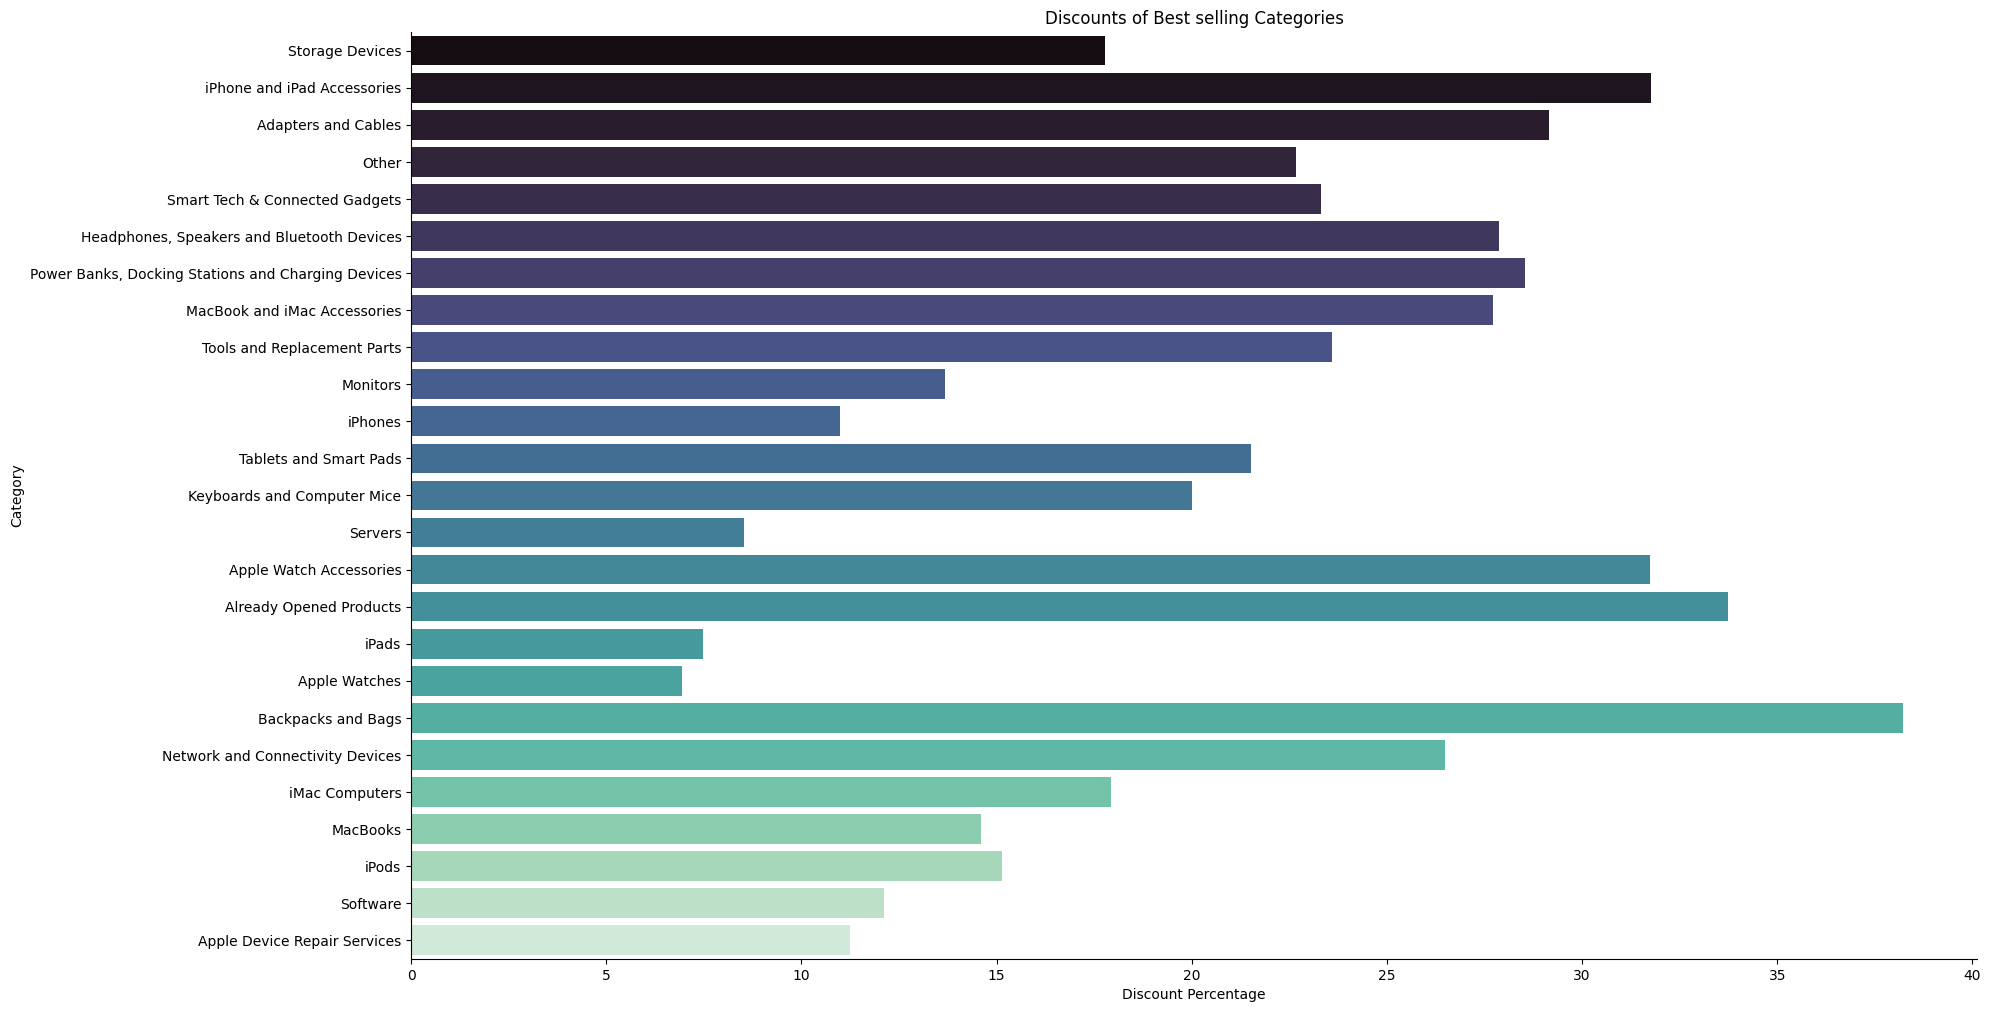

In [23]:
to_20_cats = sns.catplot(top_10_cat, y='category', x='mean_discount_perc',hue='category', kind='bar', palette="mako", height= 10, aspect=2)


to_20_cats.set(title='Discounts of Best selling Categories')
ax=to_20_cats.ax
ax.set_xlabel("Discount Percentage")
ax.set_ylabel("Category");

##Create more complex graph overlaying revenue and discounts

In [24]:
import matplotlib.pyplot as plt

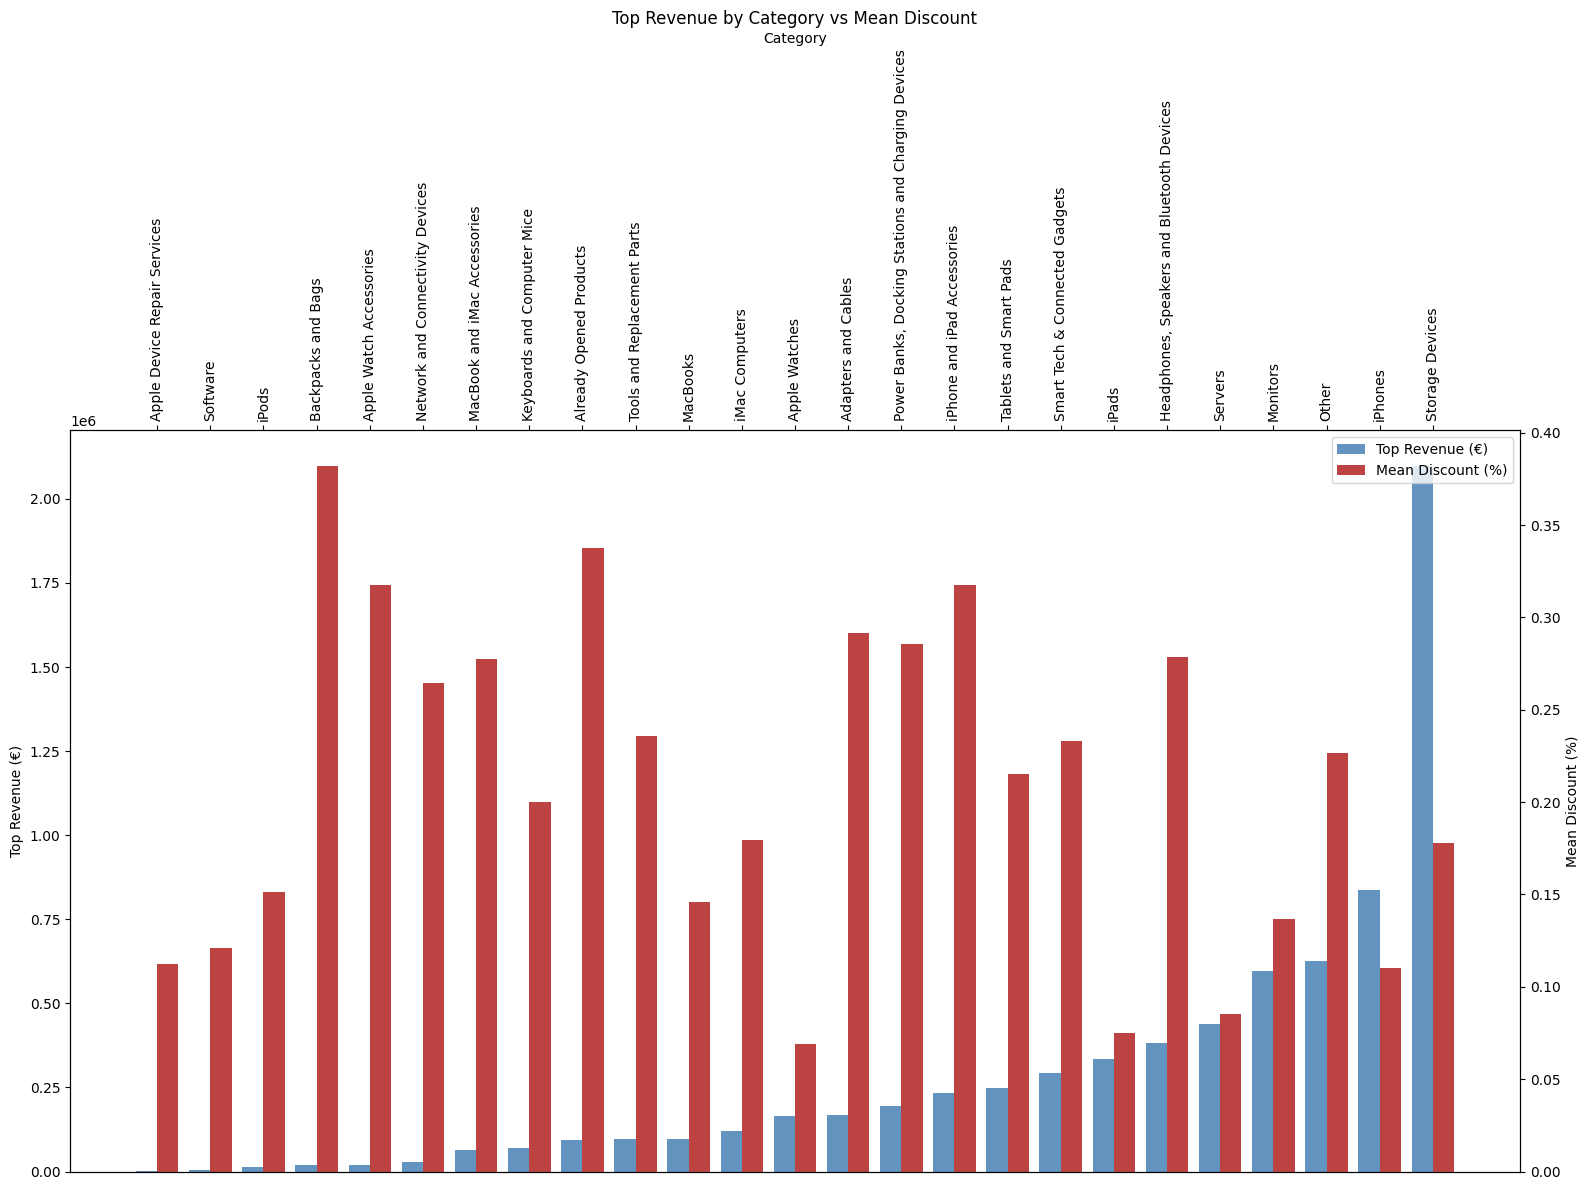

In [25]:
merged['diff'] = merged['price'] - merged['unit_price']
merged["pct_diff"] = merged['diff'] / merged['price']
merged['revenue'] = (
    orderlines_qu['product_quantity'] * orderlines_qu['unit_price']
)

top_revenue = (
    merged
    .groupby('category')
    .agg(
        top_revenue=('revenue', 'sum'),
        mean_discount=('pct_diff', 'mean')
    )
    .reset_index()
    .sort_values('top_revenue')
)

fig, ax1 = plt.subplots(figsize=(16, 12))

bar_width = 0.4
x = range(len(top_revenue))

# Revenue bars (blue, left axis)
ax1.bar(
    [i - bar_width / 2 for i in x],
    top_revenue['top_revenue'],
    width=bar_width,
    label='Top Revenue (€)',
    color='steelblue',
    alpha=0.85
)
ax1.set_ylabel('Top Revenue (€)')

# Discount bars (red, right axis)
ax2 = ax1.twinx()
ax2.bar(
    [i + bar_width / 2 for i in x],
    top_revenue['mean_discount'],
    width=bar_width,
    label='Mean Discount (%)',
    color='firebrick',
    alpha=0.85
)
ax2.set_ylabel('Mean Discount (%)')

# X-axis formatting
ax1.set_xticks(x)
ax1.set_xticklabels(top_revenue['category'])

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.set_xlabel('Category')
ax1.tick_params(axis='x', rotation=90)

plt.title('Top Revenue by Category vs Mean Discount')

# Merge legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.savefig(
    "Top_Revenue_by_Category_vs_Mean_Discount_Bars.png",
    dpi=600,
    transparent=True,
)
plt.show()

In [26]:
#shorten category lables
def truncate_label(text, max_len=30):
    if len(text) <= max_len:
        return text

    truncated = text[:max_len].rsplit(' ', 1)[0]
    return truncated + '...'

In [27]:
#make graph more visually pleasing and annotate highest revenue

In [28]:
max_len = 30

top_revenue['category_short'] = top_revenue['category'].apply(
    lambda x: truncate_label(x, max_len=30)
)

top_revenue['revenue_norm'] = (
    top_revenue['top_revenue'] / top_revenue['top_revenue'].max()
)

top_revenue['discount_norm'] = (
    top_revenue['mean_discount'] / top_revenue['mean_discount'].max()
)

In [29]:
max_idx = top_revenue['top_revenue'].idxmax()
max_x = top_revenue.index.get_loc(max_idx)
max_revenue = top_revenue.loc[max_idx, 'top_revenue']
max_revenue_norm = top_revenue.loc[max_idx, 'revenue_norm']

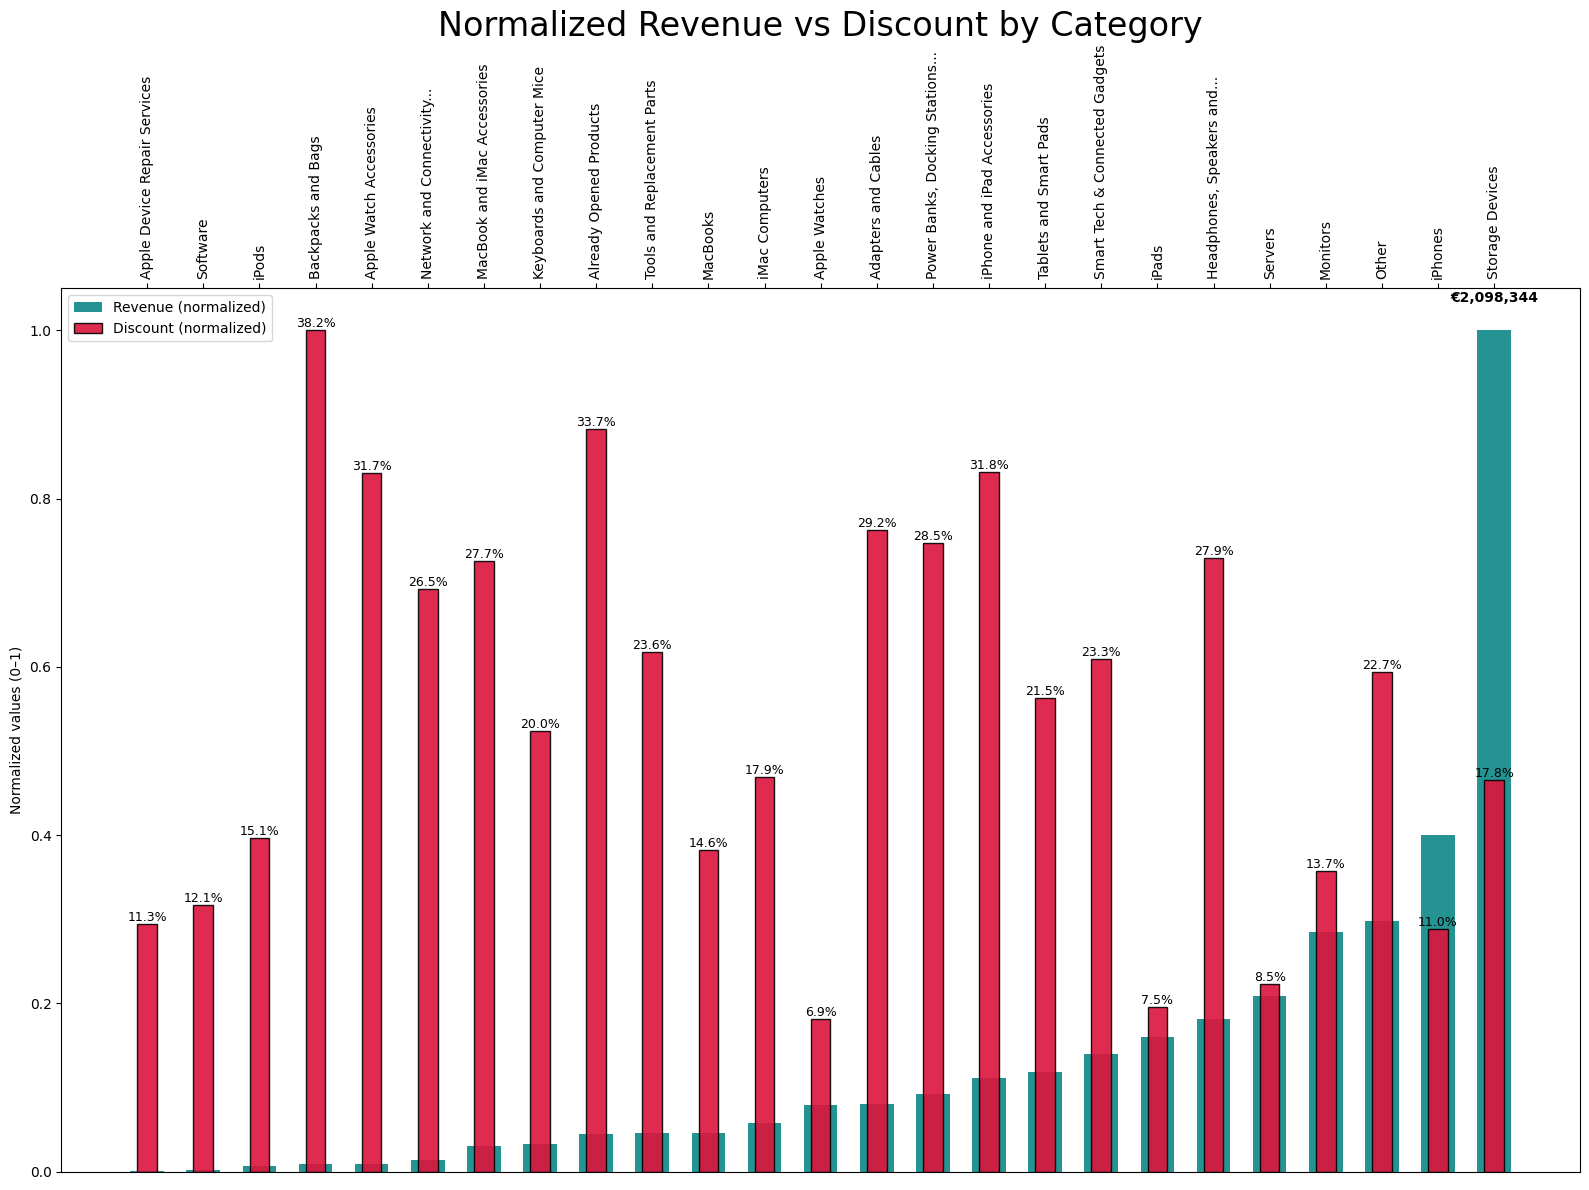

In [30]:
fig, ax = plt.subplots(figsize=(16, 12))

x = range(len(top_revenue))

# Normalized revenue
ax.bar(
    x,
    top_revenue['revenue_norm'],
    width=0.6,
    label='Revenue (normalized)',
    color='teal',
    alpha=0.85
)

# Normalized discount
bars = ax.bar(
    x,
    top_revenue['discount_norm'],
    width=0.35,
    label='Discount (normalized)',
    color='crimson',
    edgecolor='black',
    linewidth=1,
    alpha=0.9
)

# Annotate with real % values
for bar, pct in zip(bars, top_revenue['mean_discount']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{pct:.1%}',
        ha='center',
        va='bottom',
        fontsize=9
    )

ax.set_ylabel('Normalized values (0–1)')
ax.set_xticks(x)
ax.set_xticklabels(top_revenue['category_short'])

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlabel('')
ax.tick_params(axis='x', rotation=90)


ax.text(
    max_x,
    max_revenue_norm + 0.03,  # small offset above bar
    f'€{max_revenue:,.0f}',
    ha='center',
    va='bottom',
    fontsize=10,
    fontweight='bold',
    color='black'
)

plt.title('Normalized Revenue vs Discount by Category', fontdict = {'fontsize' : 24})
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig(
    "Top_Revenue_by_Category_vs_Mean_Discount_Bars.png",
    dpi=600,
    transparent=True,
)
plt.show()

##Create graph to look for influence of sale-timing

In [31]:
#total Discount: base price*product_quantity  - actual unit price * product_quantity paid
merged['discount_total'] = (
    (merged['price'] * merged['product_quantity'])
    - (merged['unit_price'] * merged['product_quantity'])

)

In [32]:
#Choose period: weekly
merged['week'] = merged['date'].dt.to_period('W')
merged

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,...,type,brand,category,discount,discount_percent,diff,pct_diff,revenue,discount_total,week
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,...,12755395,OWC,Other,13.50,22.13,13.50,0.22,47.49,13.50,2016-12-26/2017-01-01
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s / 5c / 4S,22.95,...,5720,iOttie,Other,3.96,17.25,3.96,0.17,18.99,3.96,2016-12-26/2017-01-01
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,"Apple 85W MagSafe 2 charger MacBook Pro screen Retina 15 ""(OEM)",Apple MagSafe 2 Charger for MacBook Pro 15-inch Retina 85W unboxed,89.00,...,13005399,Apple,"Power Banks, Docking Stations and Charging Devices",16.81,18.89,16.81,0.19,72.19,16.81,2016-12-26/2017-01-01
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with 555MB for Mac and PC.,76.99,...,1298,Crucial,Already Opened Products,16.09,20.90,16.09,0.21,60.90,16.09,2016-12-26/2017-01-01
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather strap color display compatible with iPhone,299.99,...,11905404,Pebble,Smart Tech & Connected Gadgets,157.50,52.50,157.50,0.53,142.49,157.50,2016-12-26/2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m White (OEM),Apple Lightning USB Cable 1 meter to charge and sync iPhone iPad and iPod,25.00,...,1230,Apple,Adapters and Cables,15.01,60.04,15.01,0.60,9.99,15.01,2018-03-12/2018-03-18
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m White (OEM),Apple Lightning USB Cable 1 meter to charge and sync iPhone iPad and iPod,25.00,...,1230,Apple,Adapters and Cables,15.01,60.04,15.01,0.60,19.98,30.02,2018-03-12/2018-03-18
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m White (OEM),Apple Lightning USB Cable 1 meter to charge and sync iPhone iPad and iPod,25.00,...,1230,Apple,Adapters and Cables,15.01,60.04,15.01,0.60,19.98,30.02,2018-03-12/2018-03-18
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m White (OEM),Apple Lightning USB Cable 1 meter to charge and sync iPhone iPad and iPod,25.00,...,1230,Apple,Adapters and Cables,15.01,60.04,15.01,0.60,29.97,45.03,2018-03-12/2018-03-18


In [33]:
weekly_summary = merged.groupby('week').agg({
    'revenue': 'sum',
    'discount_total': 'sum'
}).reset_index()

# Convert month back to timestamp for plotting
weekly_summary['week'] = weekly_summary['week'].dt.to_timestamp()
weekly_summary.head(5)

,week,revenue,discount_total
0,2016-12-26,12529.25,3699.70
1,2017-01-02,116776.24,37184.16
2,2017-01-09,127704.85,40156.03
3,2017-01-16,98291.32,25474.72
4,2017-01-23,101492.93,32173.93


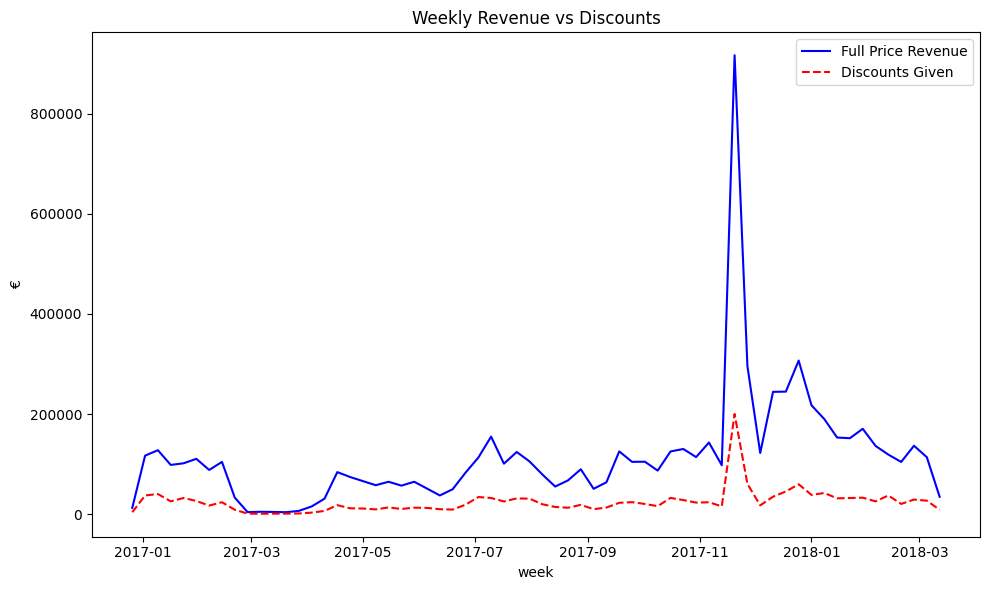

In [34]:
plt.figure(figsize=(10,6))

plt.plot(weekly_summary['week'], weekly_summary['revenue'], label='Full Price Revenue', color='blue')
plt.plot(weekly_summary['week'], weekly_summary['discount_total'], linestyle='--', label='Discounts Given', color='red')

plt.title('Weekly Revenue vs Discounts')
plt.xlabel('week')
plt.ylabel('€')
plt.legend()
plt.tight_layout()

plt.savefig(
    "time_discounts.png",
    dpi=600,
    transparent=True,
)

plt.show()

#Download graphs

In [35]:
#download
to_20_plot.savefig("best selling categories.png", format="png", dpi=600, transparent=True)
files.download("best selling categories.png")
files.download("Top_Revenue_by_Category_vs_Mean_Discount_Bars.png")
files.download("time_discounts.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>